# Part I - Loan Data Exploration 
## by Abdulelah

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will use this data to answer some questions that I have.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

As we can see, we have missing values in our data, but first we will choose our needed columns in our analysis.

In [5]:
col = ['Term', 
       'LoanStatus',
       'CreditGrade',
       'EstimatedEffectiveYield',
       'BorrowerRate',
       'BorrowerAPR',
       'ProsperScore',
       'ProsperRating (numeric)',
       'ProsperRating (Alpha)',
       'ListingCategory (numeric)',
       'EmploymentStatus',
       'Occupation',
       'EmploymentStatusDuration', 
       'IsBorrowerHomeowner', 
       'IncomeVerifiable', 
       'StatedMonthlyIncome', 
       'MonthlyLoanPayment',
       'Recommendations', 
       'DebtToIncomeRatio',
       'LoanOriginalAmount' ,
       'PercentFunded',
       'IncomeRange',
       'Investors',
       'BorrowerState']

In [6]:
loans = df[col]

In [7]:
loans.head(5)

,Term,LoanStatus,CreditGrade,EstimatedEffectiveYield,BorrowerRate,BorrowerAPR,ProsperScore,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Completed,C,NaN,0.1580,0.16516,NaN,NaN,NaN,0,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,36,Current,NaN,0.07960,0.0920,0.12016,7.0,6.0,A,2,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,36,Completed,HR,NaN,0.2750,0.28269,NaN,NaN,NaN,0,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA
3,36,Current,NaN,0.08490,0.0974,0.12528,9.0,6.0,A,16,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,NaN,0.18316,0.2085,0.24614,4.0,3.0,D,2,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
CreditGrade                  28953 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerRate                 113937 non-null float64
BorrowerAPR                  113912 non-null float64
ProsperScore                 84853 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommen

In [9]:
loans.describe()

,Term,EstimatedEffectiveYield,BorrowerRate,BorrowerAPR,ProsperScore,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113937.000000,113912.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.192764,0.218828,5.950067,4.072243,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.074818,0.080364,2.376501,1.673227,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.000000,0.006530,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.134000,0.156290,4.000000,3.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.184000,0.209760,6.000000,4.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.250000,0.283810,8.000000,5.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.497500,0.512290,11.000000,7.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to figure out what are the best features to predict the loan outcome.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think employment status is the most important feature, also income of the borrower.

## Univariate Exploration

### Categorical Features

In [10]:
loans.columns

Index(['Term', 'LoanStatus', 'CreditGrade', 'EstimatedEffectiveYield',
       'BorrowerRate', 'BorrowerAPR', 'ProsperScore',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatus', 'Occupation',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
       'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

#### IncomeRange

In [11]:
loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

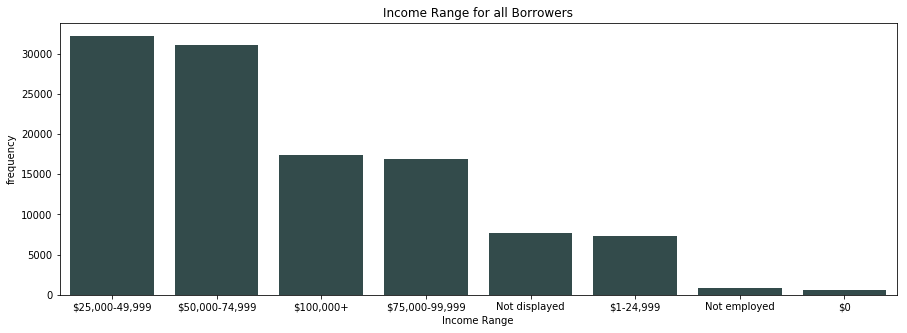

In [12]:
plt.figure(figsize = [15, 5]) 
loans = loans[loans['IncomeRange'].isnull() == False]
sns.countplot(data = loans, x = 'IncomeRange', color = 'darkslategrey',
             order = loans['IncomeRange'].value_counts().index)
plt.xlabel('Income Range')
plt.ylabel('frequency')
plt.title('Income Range for all Borrowers');

> Most borrowers have an income between 25,000 and 75,000

#### IsBorrowerHomeowner

In [13]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

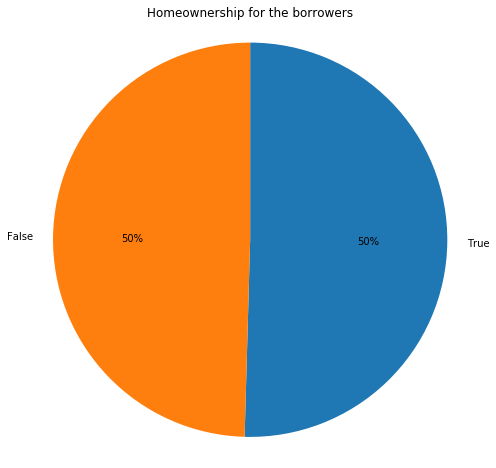

In [14]:
plt.figure(figsize = [15, 8])
sortedd = loans['IsBorrowerHomeowner'].value_counts()
plt.pie(sortedd, labels = sortedd.index, startangle = 90,
        counterclock = False, autopct = '%.0f%%');
plt.title("Homeownership for the borrowers")
plt.axis('square');

> half of the borrowers are home owners

#### Employment

In [15]:
loans['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

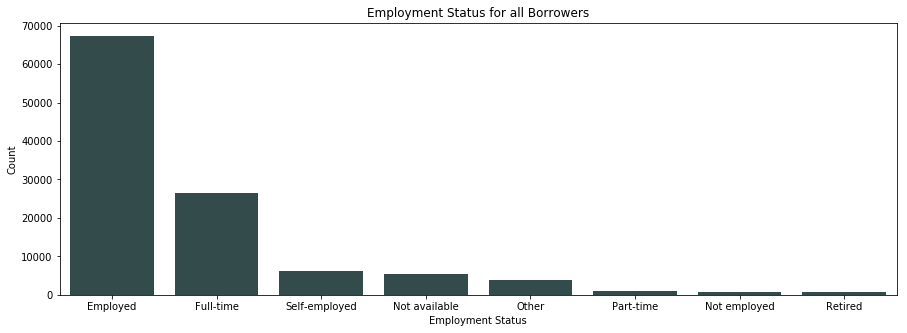

In [16]:
plt.figure(figsize = [15, 5]) 
loans = loans[loans['EmploymentStatus'].isnull() == False]
sns.countplot(data = loans, x = 'EmploymentStatus', color = 'darkslategrey',
             order = loans['EmploymentStatus'].value_counts().index)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status for all Borrowers');

> Most of the borrowers are employed 

#### LoanStatus

In [17]:
loans['LoanStatus'].value_counts()

Current                   56576
Completed                 36635
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

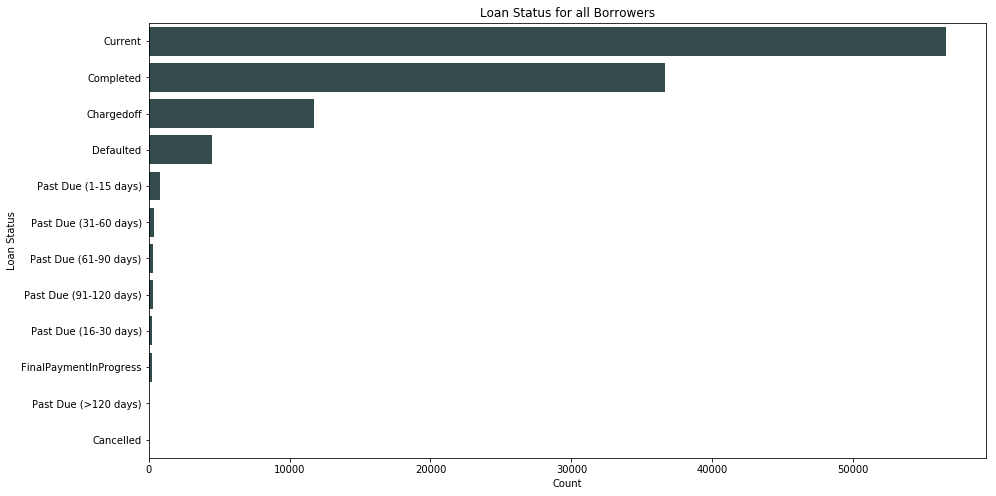

In [18]:
plt.figure(figsize = [15, 8]) 
loans = loans[loans['LoanStatus'].isnull() == False]
sns.countplot(data = loans, y = 'LoanStatus', color = 'darkslategrey',
             order = loans['LoanStatus'].value_counts().index)
plt.ylabel('Loan Status')
plt.xlabel('Count')
plt.title('Loan Status for all Borrowers');

> Most loans are in current status, and after that we have completed loans.

#### ListingCategory

In [19]:
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     14710
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [20]:
#because its in Nominal variables, so we should change it first to be clear
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

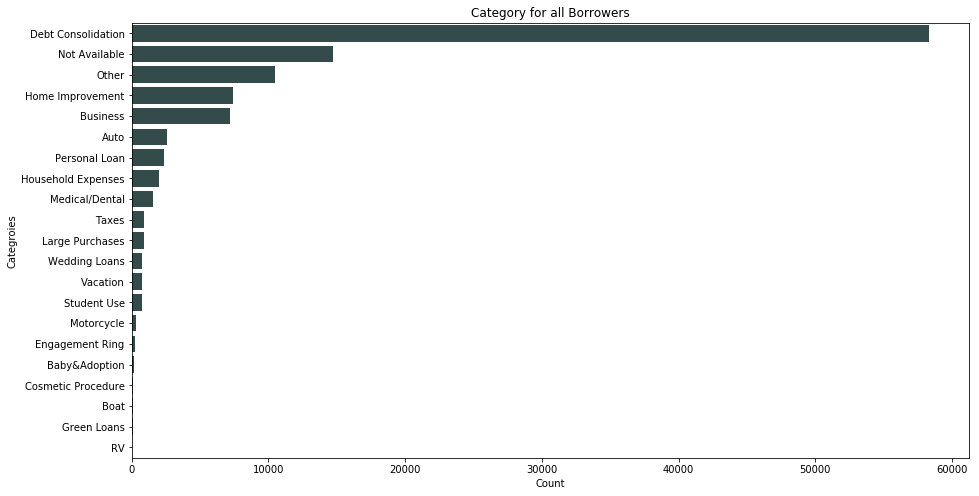

In [21]:
plt.figure(figsize = [15, 8]) 
loans = loans[loans['ListingCategory (numeric)'].isnull() == False]
sns.countplot(data = loans, y = 'ListingCategory (numeric)', color = 'darkslategrey',
             order = loans['ListingCategory (numeric)'].value_counts().index)
plt.ylabel('Categroies')
plt.xlabel('Count')
plt.title('Category for all Borrowers');

> Most of the borrowers need a loan for Debt consolidation

#### BorrowerState

In [22]:
loans['BorrowerState'].value_counts()

CA    14577
TX     6699
NY     6692
FL     6674
IL     5898
GA     4904
OH     4196
MI     3543
VA     3272
NJ     3093
NC     3055
WA     3008
PA     2968
MD     2812
MO     2583
MN     2316
MA     2224
CO     2188
IN     2067
AZ     1878
WI     1837
OR     1787
TN     1734
AL     1667
CT     1625
SC     1118
NV     1090
KS     1050
KY      983
OK      966
LA      950
UT      870
AR      853
MS      785
NE      671
ID      595
NH      547
NM      466
RI      435
HI      408
WV      385
DC      382
MT      325
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME       97
ND       49
Name: BorrowerState, dtype: int64

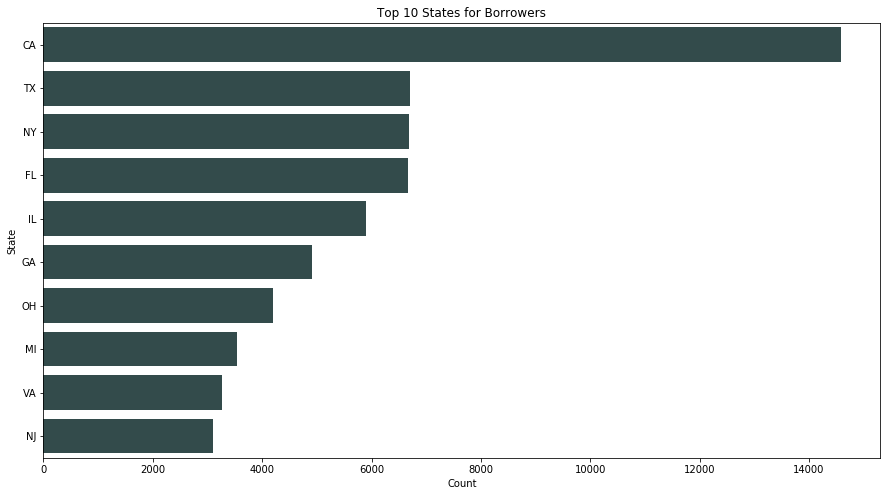

In [23]:
#there is a lot of states, so we will see the top 10 states
plt.figure(figsize = [15, 8]) 
loans = loans[loans['BorrowerState'].isnull() == False]
sns.countplot(data = loans, y = 'BorrowerState', color = 'darkslategrey',
             order = loans['BorrowerState'].value_counts().head(10).index)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Top 10 States for Borrowers');

> So most of the borrowers are in CA, TX, NY, and FL

#### Occupation

In [24]:
loans['Occupation'].value_counts()

Other                                 27487
Professional                          13122
Computer Programmer                    4243
Executive                              4189
Teacher                                3649
Administrative Assistant               3547
Analyst                                3486
Sales - Commission                     3256
Accountant/CPA                         3131
Clerical                               2960
Sales - Retail                         2681
Skilled Labor                          2674
Retail Management                      2500
Nurse (RN)                             2448
Construction                           1738
Truck Driver                           1631
Police Officer/Correction Officer      1538
Laborer                                1535
Civil Service                          1418
Engineer - Mechanical                  1365
Food Service Management                1216
Military Enlisted                      1199
Food Service                    

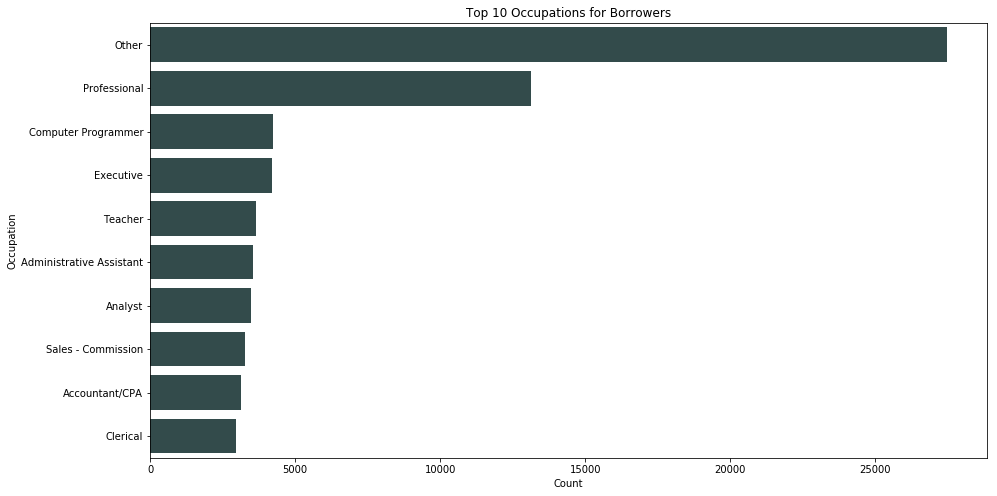

In [25]:
# In Occupation also we have a lot of variables, so we need to see the top 10 
plt.figure(figsize = [15, 8]) 
loans = loans[loans['Occupation'].isnull() == False]
sns.countplot(data = loans, y = 'Occupation', color = 'darkslategrey',
             order = loans['Occupation'].value_counts().head(10).index)
plt.ylabel('Occupation')
plt.xlabel('Count')
plt.title('Top 10 Occupations for Borrowers');

> As we can see, most of the borrowers are professional and computer programmers and others...

### Numerical Features

#### BorrowerRate

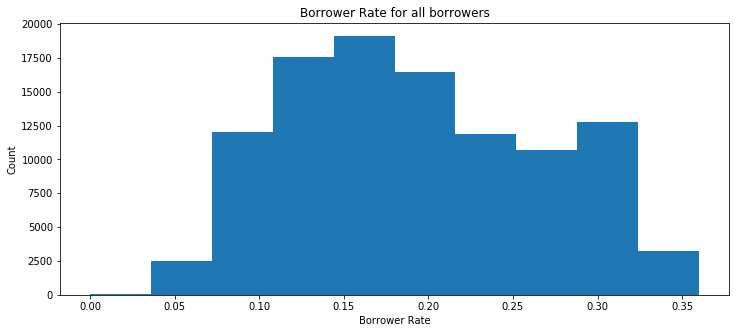

In [26]:
plt.figure(figsize = [12, 5]) 
plt.hist(data = loans, x = 'BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("Borrower Rate for all borrowers");

#### BorrowerAPR

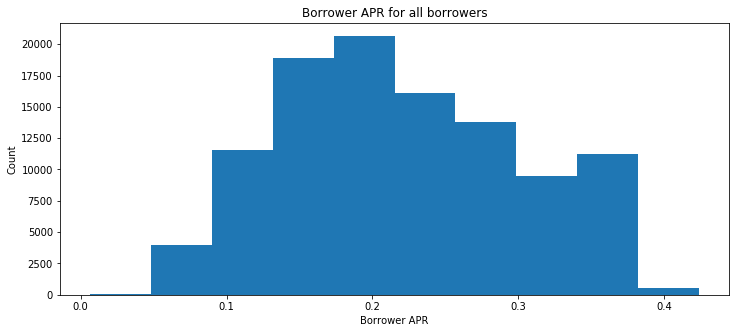

In [27]:
plt.figure(figsize = [12, 5]) 
plt.hist(data = loans, x = 'BorrowerAPR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title("Borrower APR for all borrowers");

> As we can see, Borrower Rate and Borrower APR seemed to have a normal distribution

#### LoanOriginalAmount

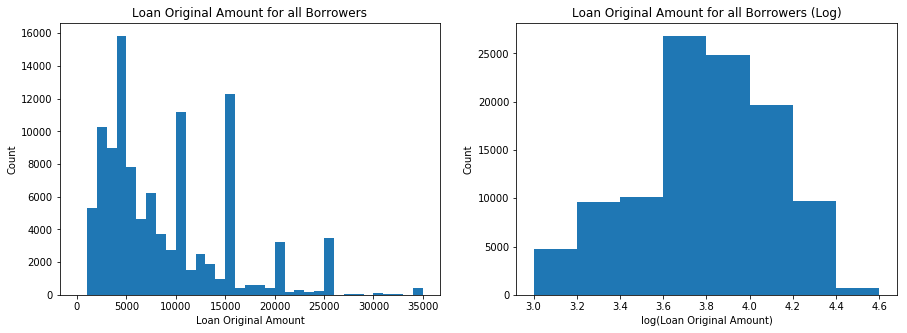

In [28]:
plt.figure(figsize = [15, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title("Loan Original Amount for all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loans['LoanOriginalAmount'])
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Loan Original Amount)')
plt.ylabel('Count')
plt.title("Loan Original Amount for all Borrowers (Log)");

loans['LoanOriginalAmount_log'] = np.log10(loans['LoanOriginalAmount'])

> as we can see, we have right-skewed distribution before the log, after that we can see that we have a normal distribution! It's interesting actually! 

#### Investors

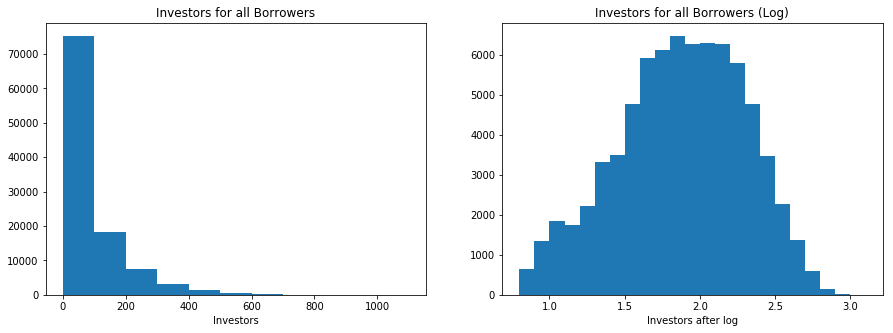

In [29]:
plt.figure(figsize = [15, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['Investors'].max()+10, 100)
plt.hist(data = loans, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors for all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loans['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('Investors after log')
plt.title("Investors for all Borrowers (Log)");

loans['Investors_log'] = np.log10(loans['Investors'])

> As we can see, We have a right-sekwed and most of the investors are between 0-200, after the log we have a normal distribution 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> for loan original amount, the distribution was right-sekwed then I did a log transform and then it appears as a normal distribution, also with investors it was a right-sekwed distribution with investors inbetween 0-200 then after the log it was also a normal distribution. for BorrowerRate and BorrowerAPR both was having a normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I don’t think the data needed a change or adjust. as an example for employment status or homeowner. all of the features the output was expected actually!

## Bivariate Exploration


#### Relationship between numerical features

In [30]:
numeric = ['BorrowerRate',
           'BorrowerAPR',
           'LoanOriginalAmount',
           'Investors',
           'LoanOriginalAmount_log',
           'Investors_log',
           'MonthlyLoanPayment',
           'StatedMonthlyIncome']

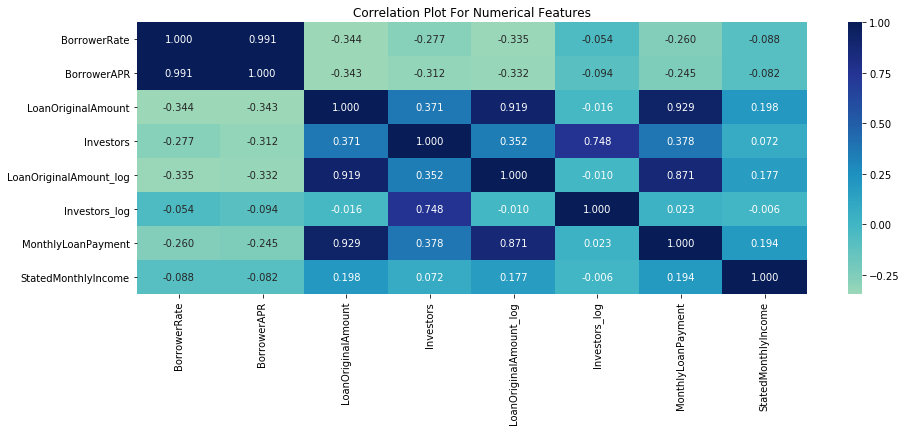

In [31]:
#correlation plot for numerical features
plt.figure(figsize = [15, 5])
sns.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0)
plt.title('Correlation Plot For Numerical Features');

> As we can see: BorrowerAPR and BorrowerRate are highly correlated, also LoanOriginalAmount with MonthlyLoanPayment are also highly correlated.

### Relationship between categorical features

In [32]:
Category = ['Term',
            'LoanStatus',
            'ListingCategory (numeric)', 
            'EmploymentStatus',
            'IncomeRange', 
            'Occupation', 
            'BorrowerState',
            'IsBorrowerHomeowner']

#### Between EmploymentStatus & IncomeRange

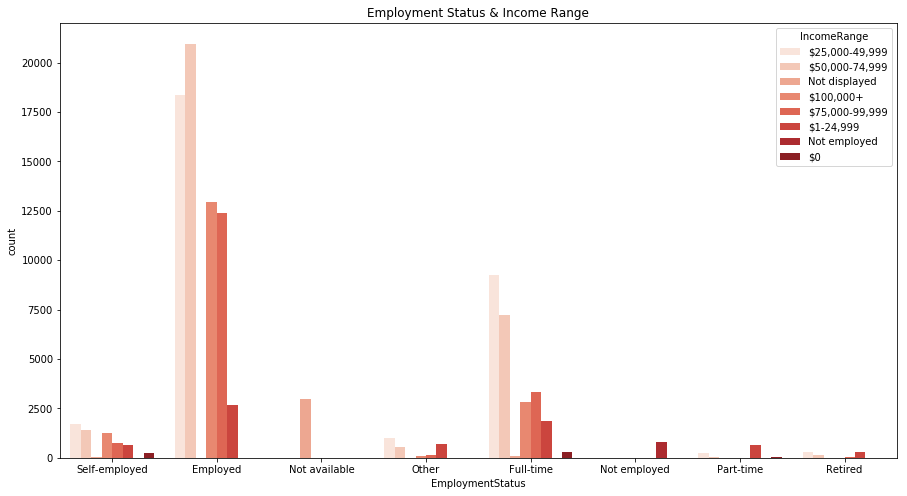

In [33]:
plt.figure(figsize = [15, 8])
sns.countplot(data = loans, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')
plt.title('Employment Status & Income Range');

> As we can see, Employment Status and Income Range are highly correlated. So Employed borrowers has the highest income.

### Relationship between Numerical & categorical features

#### Between EmploymentStatus & LoanOriginalAmount

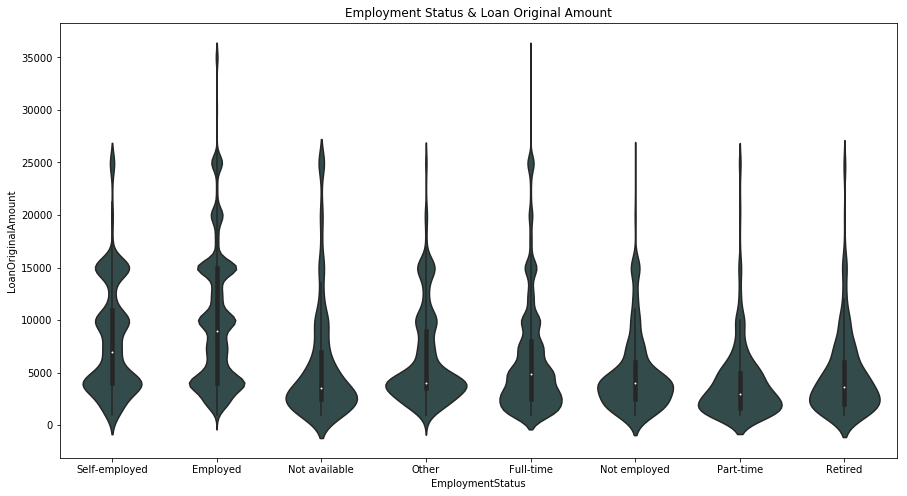

In [34]:
plt.figure(figsize = [15, 8])
sns.violinplot(data = loans, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = 'darkslategrey')
plt.title('Employment Status & Loan Original Amount');

> As we can see, most of the borrowers have a loan with less than 5,000 whatever there employment status was. Also borrowers who are employed or self-employed can have a loans with more than 10,000.

#### Between IncomeRange & LoanOriginalAmount

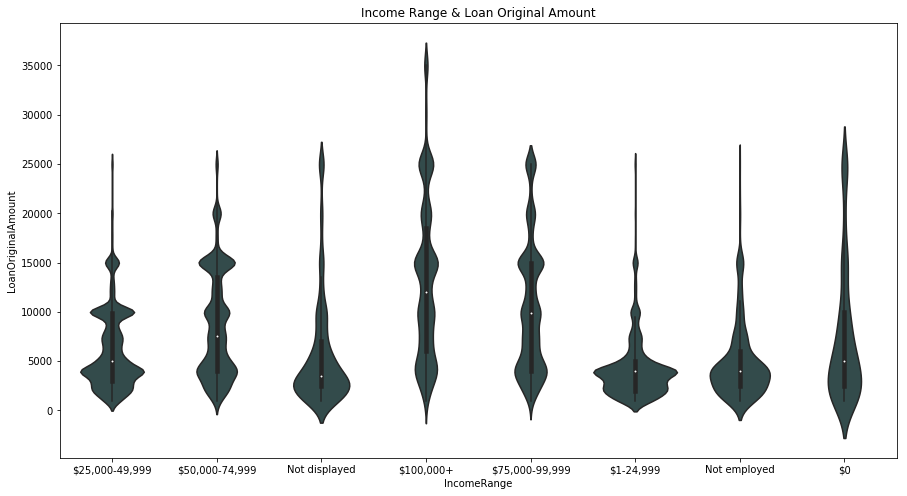

In [35]:
plt.figure(figsize = [15, 8])
sns.violinplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'darkslategrey')
plt.title('Income Range & Loan Original Amount');

> As we can see, it also proves our insight above that most of the borrowers has a loans less than 5,000 

#### Between IsBorrowerHomeowner & LoanOriginalAmount

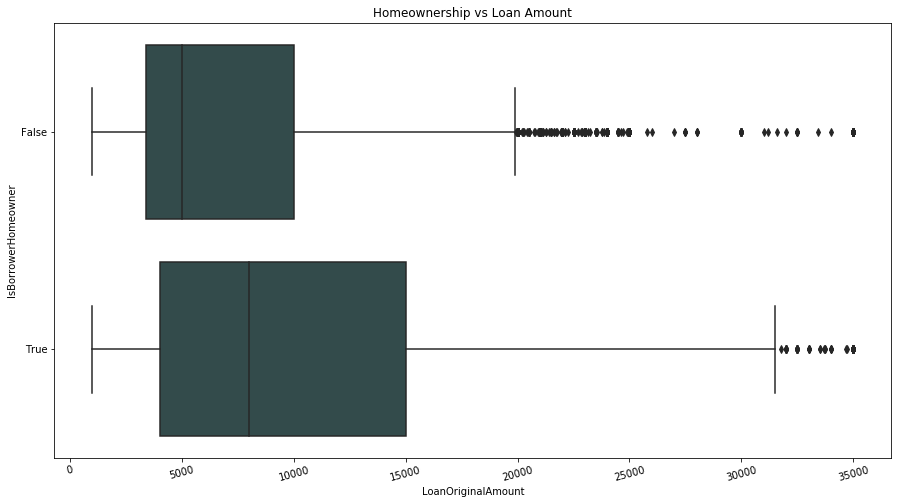

In [36]:
plt.figure(figsize = [15, 8])
ax = sns.boxplot(data = loans, x = 'LoanOriginalAmount', y = 'IsBorrowerHomeowner', orient='h', color = 'darkslategrey')
plt.xticks(rotation = 15);
plt.title('Homeownership vs Loan Amount');

> As we can see, home owners borrowers are more likely to have larger loan amount than borrowers that they are not home owners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> With numeric features, I found that BorrowerAPR and BorrowerRate are highly correlated, also LoanOriginalAmount with MonthlyLoanPayment are also highly correlated. and BorrowerAPR are negatively Associated with the loan amount, which means that the higher the loan amount, the lower borrowerAPR.

> In Employment Status and Income Range graph, I found that Employment Status and Income Range are highly correlated. So Employed borrowers has the highest income.

> In the Loan Amount and Employment Status, I found that most of the borrowers have a loan with less than 5,000 whatever there employment status was. Also borrowers who are employed or self-employed can have a loans with more than 10,000.

> Then I did the same thing but with Income Range, it also proves our insight above that most of the borrowers has a loans less than 5,000.

> In the end, in Home owner and loan amount, I found that home owners borrowers are more likely to have larger loan amount than borrowers that they are not home owners.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I am actually shocked, people with no jobs or with lower income can have a loan!

> Also I can say that EmploymentStatus and IncomeRange are similar to each other in the results, so I can also say they are highly correlated, which I can choose one of them to focus on in the next analysis.

## Multivariate Exploration

#### Between IsBorrowerHomeowner & EmploymentStatus & LoanOriginalAmount & BorrowerAPR

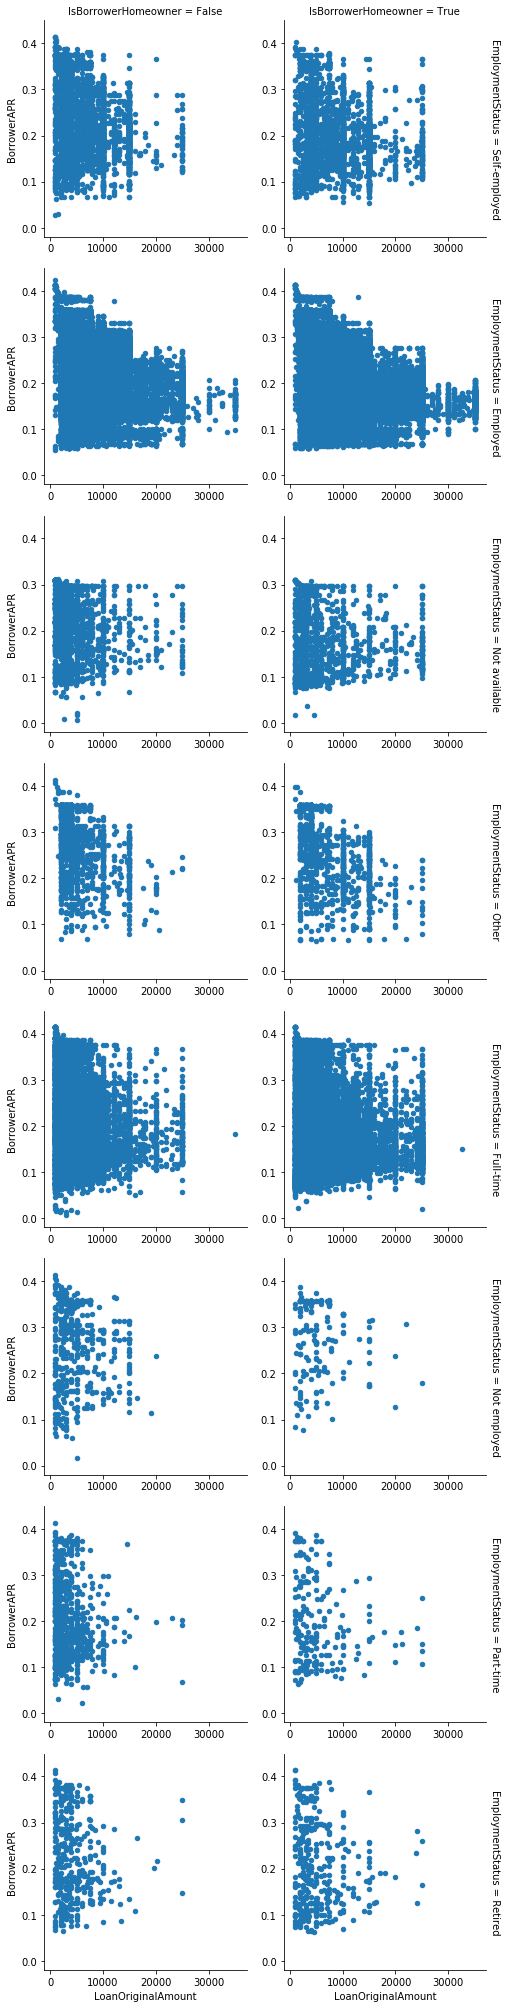

In [44]:
x = sns.FacetGrid(data = loans, 
                  col = 'IsBorrowerHomeowner', 
                  row = 'EmploymentStatus', 
                  size = 3.5,
                  margin_titles = True)

x.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', s=20);

> I couldn’t see a pattern between these four features. maybe I will see in the next analysis

#### between IsBorrowerHomeowner & EmploymentStatus & and LoanOriginalAmount

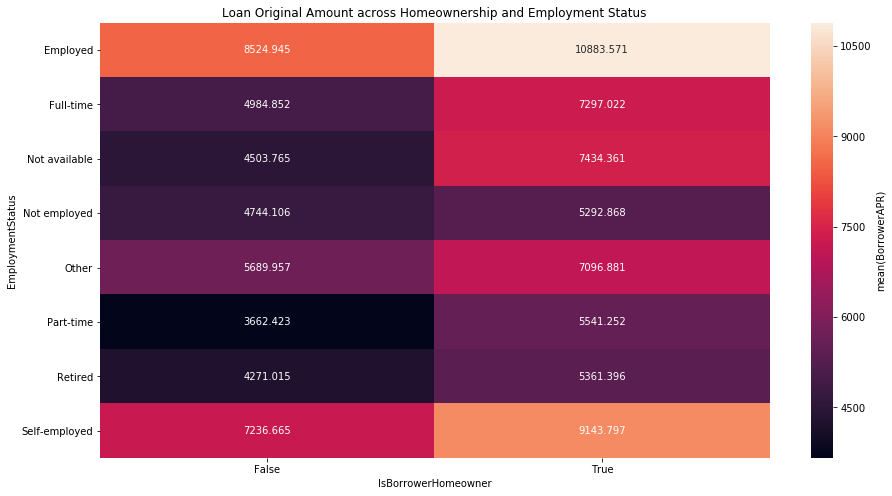

In [38]:
plt.figure(figsize = [15, 8])
means = loans.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['LoanOriginalAmount']
means = means.reset_index(name = 'LoanOriginalAmount_avg')
means = means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'LoanOriginalAmount_avg')
sns.heatmap(means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Loan Original Amount across Homeownership and Employment Status');

> As we can seem home owner borrowers and employed are having highest amount of a loan, and borrowers with no home to own still having larger amount of loans.

### Between LoanOriginalAmount & IsBorrowerHomeowner & EmploymentStatus

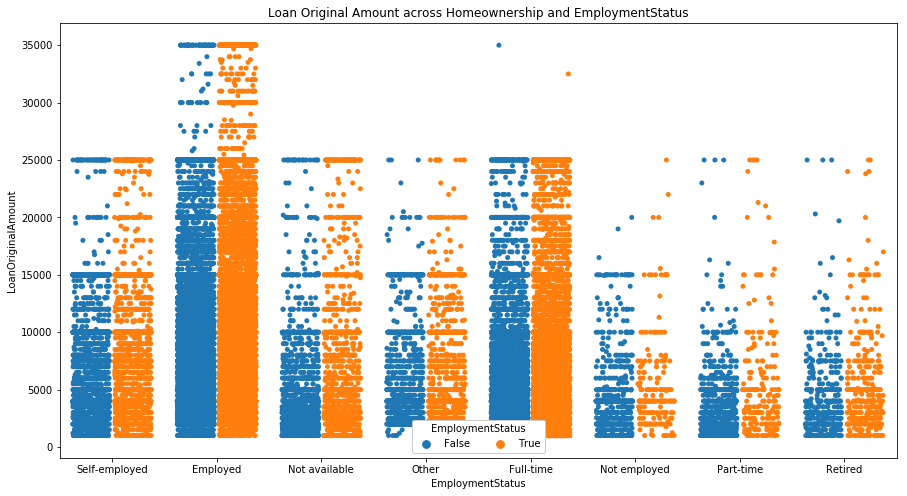

In [39]:
plt.figure(figsize = [15, 8])
ax1 = sns.stripplot(data = loans, 
                    x = 'EmploymentStatus', 
                    y = 'LoanOriginalAmount', 
                    hue = 'IsBorrowerHomeowner',
                    jitter = 0.35, 
                    dodge = True)
ax1.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')
plt.title('Loan Original Amount across Homeownership and EmploymentStatus');

> As we can see, the plot shows that home owner borrowers and employed are most likely to have a higher amount

#### Between EmploymentStatus & BorrowerRate & IsBorrowerHomeowner

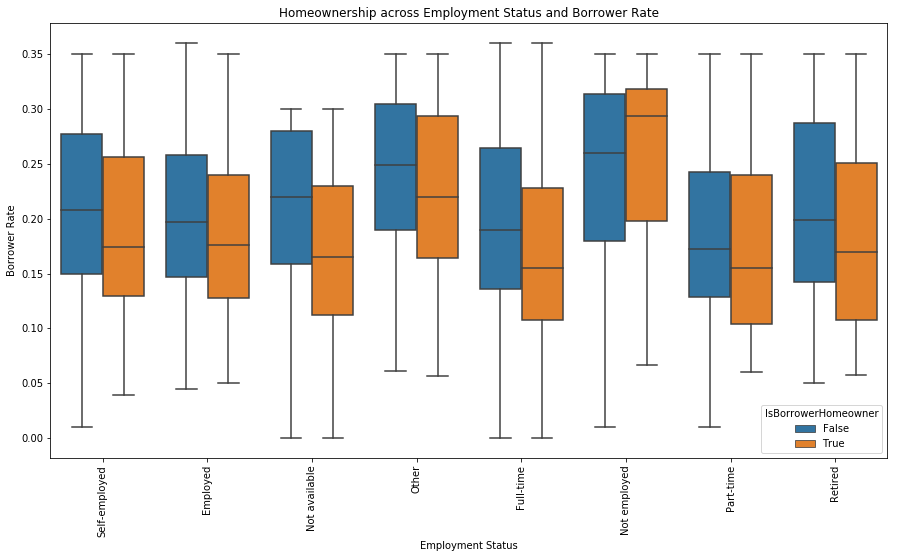

In [40]:
plt.figure(figsize = [15, 8])
sns.boxplot(data = loans,
            x = 'EmploymentStatus', 
            y = 'BorrowerRate', 
            hue = 'IsBorrowerHomeowner')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 90)
plt.title('Homeownership across Employment Status and Borrower Rate');

> As we can see, Home owner borrowers have lower rate whatever the employment status is expect unemployed borrowers. home owner and unemployed borrowersare most likely to have higher rate than who's not homeowners.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this phase, I tried to see the patterns between the loans and other features such as employment status & borrower rate & Homeownership.

> First thing was about the relationship between borrowerAPR, IsBorrowerHomeowner, and EmploymentStatus. Borrowers who are employed have lower APR, and borrowers without a home to own and emoployed have the highest APR

> Second thing was about the relationship between IsBorrowerHomeowner & EmploymentStatus & LoanOriginalAmount. I found that borrowers with a home to own and employed have highest loan amount. And borrowers without a home to own still have the highest loan amount!

> last thing was about the relationship Between EmploymentStatus & BorrowerRate & IsBorrowerHomeowner. I found out that Home owner borrowers have lower rate whatever the employment status is expect unemployed borrowers. home owner and unemployed borrowersare most likely to have higher rate than who's not homeowners.

### Were there any interesting or surprising interactions between features?

> Borrowers with a home to own and employed: can have a high loan amount and lower APR.

> Borrowers without a home to own and employed: can have a high loan amount and higher APR.

## Conclusions

> In my analysis, I did my Question-Visualization-Observations framework to see the patterns between the features in the loans industry. first I choose some features to work on. Then did Univariate Exploration then Bivariate Exploration and then Multivariate Exploration.

> I think the Employment Status, whether the borrower are homeowner or not can impacts on the loan original amount. 

> Loan Original Amount and APR are important in loan outcome.

> In my analysis I tried to see or observe if the employment status would affect the loan amount and borrowr APR, also homeownership and if it's affect the loan original amount and APR.

> I found out that borrowers who are employed whether having a home to own or not can have higher loan amount and lower APR. And borrowers who are employed and aren’t have a home to own can also have a higher loan amount but alsothey need to pay higher APR.